In [ ]:
!pip install Kaggle


In [ ]:
from google.colab import files
files.upload()

In [ ]:

!mkdir ~/.kaggle

In [ ]:

!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d yasserh/imdb-movie-ratings-sentiment-analysis

 44% 9.00M/20.6M [00:01<00:01, 6.45MB/s]
100% 20.6M/20.6M [00:01<00:00, 16.2MB/s]


In [ ]:
!unzip imdb

Archive:  imdb.zip
  inflating: movie.csv               


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from keras import layers
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

from sklearn.feature_extraction.text import TfidfVectorizer

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from string import punctuation


import re

In [ ]:
df = pd.read_csv("movie.csv")

In [ ]:
df.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [ ]:
df["label"].value_counts()

0    20019
1    19981
Name: label, dtype: int64

In [ ]:
df.tail()

,text,label
39995,"""Western Union"" is something of a forgotten cl...",1
39996,This movie is an incredible piece of work. It ...,1
39997,My wife and I watched this movie because we pl...,0
39998,"When I first watched Flatliners, I was amazed....",1
39999,"Why would this film be so good, but only gross...",1


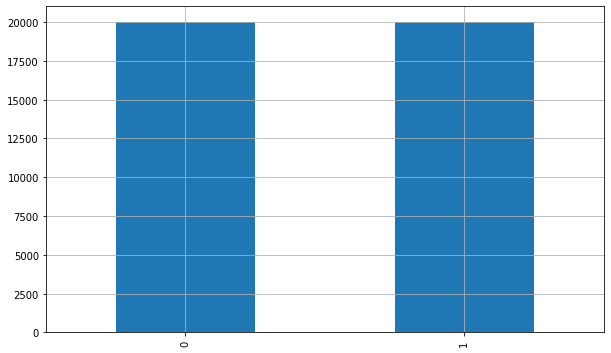

0    20019
1    19981
Name: label, dtype: int64

In [ ]:
df['label'].value_counts().plot(kind='bar',figsize=(10,6),grid='-')
plt.show()
df['label'].value_counts()

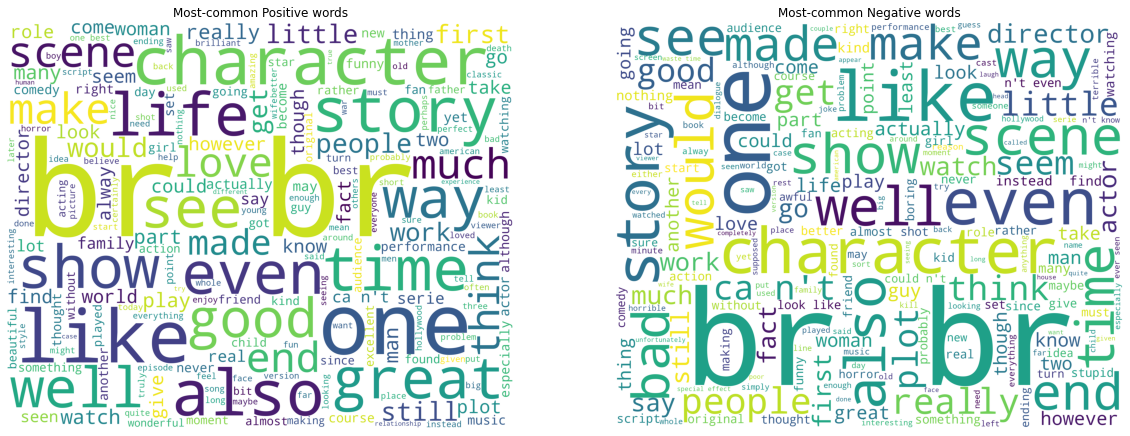

In [ ]:
from wordcloud import WordCloud
p_data = df[df['label']== 1]
p_data =p_data['text']
n_data = df[df['label']== 0]
n_data= n_data['text']

def wordcloud_draw(data, color, s):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split() if(word!='movie' and word!='film')])
    wordcloud = WordCloud(stopwords=stopwords.words('english'),background_color=color,width=2500,height=2000).generate(cleaned_word)
    plt.imshow(wordcloud)
    plt.title(s)
    plt.axis('off')

plt.figure(figsize=[20,10])
plt.subplot(1,2,1)
wordcloud_draw(p_data,'white','Most-common Positive words')

plt.subplot(1,2,2)
wordcloud_draw(n_data, 'white','Most-common Negative words')
plt.show()

In [ ]:
x=df['text']
y = df['label']

In [ ]:
y.head()

0    0
1    0
2    0
3    0
4    1
Name: label, dtype: int64

In [ ]:
import re
pattern = "[^a-zA-Z0-9$,.]"
x = [re.sub(pattern," ",sentence).lower().strip() for sentence in x]

def cleaning_data(df):
    data=df['text']
    stop_words=list(stopwords.words('english'))+list(punctuation)
    
    lemmatizer=WordNetLemmatizer()
    corpus=data.tolist()
    final_corpus=[]
    
    for i in range(len(corpus)):
        word=word_tokenize(corpus[i].lower())
        word=[
            lemmatizer.lemmatize(y) for y in word if y not in stop_words
        ]
        j=" ".join(word)
        final_corpus.append(j)
    
    return final_corpus

In [ ]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloadin

True

In [ ]:
df["text"] = cleaning_data(df)

In [ ]:
df.head()

,text,label
0,grew b 1965 watching loving thunderbird mate s...,0
1,put movie dvd player sat coke chip expectation...,0
2,people know particular time past like feel nee...,0
3,even though great interest biblical movie bore...,0
4,im die hard dad army fan nothing ever change g...,1


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df['text'],df['label'], test_size = 0.2, random_state = 42)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(32000,) (32000,)
(8000,) (8000,)


# Model 1

### Count Vectorizer with Logistic regression

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer

In [ ]:
count_vectorizer = CountVectorizer(max_df = 0.9 , min_df = 2 , stop_words = 'english' , max_features = 1000)
x_train_2= count_vectorizer.fit_transform(x_train)

In [ ]:
x_test_2 = count_vectorizer.transform(x_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter = 4000)
lr.fit(x_train_2 ,y_train)

pred2 = lr.predict(x_test_2)

In [ ]:
from sklearn import metrics
metrics.confusion_matrix(pred2 , y_test)

array([[3355,  544],
       [ 611, 3490]])

In [ ]:
metrics.accuracy_score(pred2 ,y_test)

0.855625

In [ ]:
print(metrics.classification_report(pred2 ,y_test))

              precision    recall  f1-score   support

           0       0.85      0.86      0.85      3899
           1       0.87      0.85      0.86      4101

    accuracy                           0.86      8000
   macro avg       0.86      0.86      0.86      8000
weighted avg       0.86      0.86      0.86      8000



In [ ]:
## The accuracy of this model is 85%

# Model 2

## tfidfvectorizer with Logistic regression

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_df = 0.9 , min_df = 2 , stop_words = 'english' , max_features = 1000)
x_train_3 = tfidf_vectorizer.fit_transform(x_train)

In [ ]:
x_test_3 = tfidf_vectorizer.transform(x_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train_3 ,y_train)

pred3 = lr.predict(x_test_3)

In [ ]:
from sklearn import metrics
metrics.confusion_matrix(pred3 , y_test)

array([[3353,  518],
       [ 613, 3516]])

In [ ]:
metrics.accuracy_score(pred3 ,y_test)

0.858625

In [ ]:
print(metrics.classification_report(pred3 ,y_test))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86      3871
           1       0.87      0.85      0.86      4129

    accuracy                           0.86      8000
   macro avg       0.86      0.86      0.86      8000
weighted avg       0.86      0.86      0.86      8000



In [ ]:
## The accuracy of this model is also near 85%

# Model 3

### LSTM

In [ ]:
MAX_NB_WORDS = 50000

MAX_SEQUENCE_LENGTH = 250
EMBEDDING_DIM = 100
tokenizer = keras.preprocessing.text.Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(x_train.values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 83536 unique tokens.


In [ ]:
x = tokenizer.texts_to_sequences(x_train.values)
x_train_1 = keras.preprocessing.sequence.pad_sequences(x, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', x_train_1.shape)

Shape of data tensor: (32000, 250)


In [ ]:
x2 = tokenizer.texts_to_sequences(x_test.values)
x_test_1 = keras.preprocessing.sequence.pad_sequences(x2, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', x_test_1.shape)

Shape of data tensor: (8000, 250)


In [ ]:
x_train_1

array([[    0,     0,     0, ...,     3,    32,    13],
       [    0,     0,     0, ...,   843,   580,    77],
       [    0,     0,     0, ..., 11603,    73,   791],
       ...,
       [    0,     0,     0, ...,  5804, 29214,     5],
       [    0,     0,   439, ...,   575,   341,   906],
       [    0,     0,     0, ...,    70,  1757,     3]], dtype=int32)

In [ ]:
x_test_1

array([[    0,     0,     0, ...,    89,    44,   494],
       [    2,   354,  9184, ...,     1,   622,    77],
       [    0,     0,     0, ...,   279,     1,     1],
       ...,
       [    0,     0,     0, ...,  5038,   122, 19551],
       [    0,     0,     0, ..., 21639,   732,   729],
       [    0,     0,     0, ...,  3449,  3483,   227]], dtype=int32)

In [ ]:
y_train

14307    1
17812    1
11020    0
15158    0
24990    0
        ..
6265     0
11284    1
38158    1
860      0
15795    0
Name: label, Length: 32000, dtype: int64

In [ ]:
x_train.shape

(32000,)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense , Dropout , LSTM , Bidirectional , Embedding

model=Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM,input_length=250))
model.add(LSTM(100))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 250, 100)          5000000   
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 5,080,501
Trainable params: 5,080,501
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
epochs = 5
batch_size = 64
model.fit(x_train_1 , y_train,epochs=epochs, batch_size=batch_size,validation_data=(x_test_1,y_test))

Epoch 1/5
500/500 [==============================] - 29s 58ms/step - loss: 0.0947 - accuracy: 0.9673 - val_loss: 0.3779 - val_accuracy: 0.8675
Epoch 2/5
500/500 [==============================] - 27s 54ms/step - loss: 0.0627 - accuracy: 0.9784 - val_loss: 0.3929 - val_accuracy: 0.8624
Epoch 3/5
500/500 [==============================] - 27s 55ms/step - loss: 0.0345 - accuracy: 0.9891 - val_loss: 0.4886 - val_accuracy: 0.8656
Epoch 4/5
500/500 [==============================] - 28s 57ms/step - loss: 0.0404 - accuracy: 0.9860 - val_loss: 0.4403 - val_accuracy: 0.8553
Epoch 5/5
500/500 [==============================] - 28s 57ms/step - loss: 0.0671 - accuracy: 0.9758 - val_loss: 0.4302 - val_accuracy: 0.8666


In [ ]:
## The accuracy of this model is 97% on training set and 86 on testing set.

# Model 4

## tfidf with Randomforest

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_df = 0.9 , min_df = 2 , stop_words = 'english' , max_features = 1000)
x_train_4 = tfidf_vectorizer.fit_transform(x_train)

In [ ]:
x_test_4 = tfidf_vectorizer.transform(x_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train_4 , y_train)
pred4 = rf.predict(x_test_4)

In [ ]:
from sklearn import metrics
metrics.confusion_matrix(pred4 ,y_test)

array([[3270,  662],
       [ 696, 3372]])

In [ ]:
metrics.accuracy_score(pred4 , y_test)

0.83025

In [ ]:
print(metrics.classification_report(pred4 , y_test))

              precision    recall  f1-score   support

           0       0.82      0.83      0.83      3932
           1       0.84      0.83      0.83      4068

    accuracy                           0.83      8000
   macro avg       0.83      0.83      0.83      8000
weighted avg       0.83      0.83      0.83      8000



In [ ]:
# This model has an accuracy of 83%